# ResNet50 Model | CIFAKE


In [18]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.applications import ResNet50
from keras.optimizers import Adam
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [19]:
model_name = "resnet_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = True

# Don't save the model
no_save = False

In [20]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [21]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [22]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            base_model,
            GlobalAveragePooling2D(),
            Dense(1024, "relu"),
            BatchNormalization(),
            Dense(512, "relu"),
            BatchNormalization(),
            Dense(256, "relu"),
            BatchNormalization(),
            Dropout(0.2),
            Dense(2, "softmax"),
        ],
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

In [23]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2

In [24]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [25]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
10000/10000 [==============================] - 701s 69ms/step - loss: 0.6328 - accuracy: 0.6572 - val_loss: 0.7481 - val_accuracy: 0.5620
Epoch 2/10
10000/10000 [==============================] - 530s 53ms/step - loss: 0.5893 - accuracy: 0.6912 - val_loss: 0.5688 - val_accuracy: 0.6913
Epoch 3/10
10000/10000 [==============================] - 294s 29ms/step - loss: 0.5752 - accuracy: 0.7024 - val_loss: 0.5714 - val_accuracy: 0.7133
Epoch 4/10
10000/10000 [==============================] - 123s 12ms/step - loss: 0.5642 - accuracy: 0.7110 - val_loss: 0.5345 - val_accuracy: 0.7344
Epoch 5/10
10000/10000 [==============================] - 120s 12ms/step - loss: 0.5608 - accuracy: 0.7137 - val_loss: 2.3063 - val_accuracy: 0.5976
Epoch 6/10
10000/10000 [==============================] - 121s 12ms/step - loss: 0.5580 - accuracy: 0.7167 - val_loss: 0.7452 - val_accuracy: 0.7009
Epoch 7/10
10000/10000 [==============================] - 122s 12ms/step - loss: 0.5541 - accuracy: 0.7190

In [26]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/resnet_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/resnet_model_cifake/model\assets


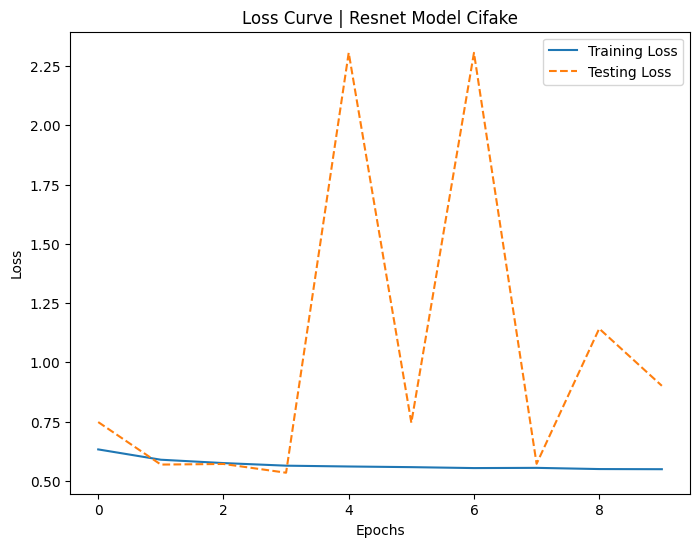

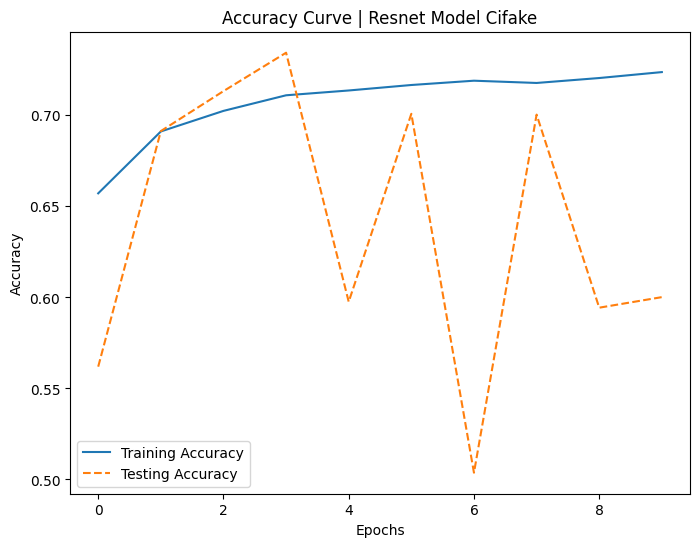

In [27]:
# Plot performance curves
plot_performance_curves(history, model_name)